## YCSB-B

operationcount=40000000, cache_size=34359738368, threads=4
1567(b) 1569(b) 1570(b) 1571(b) 
operationcount=40000000, cache_size=34359738368, threads=8
1572(b) 1574(b) 1575(b) 1576(b) 
operationcount=40000000, cache_size=34359738368, threads=16
1577(b) 1579(b) 1580(b) 1581(b) 


,conf_id,workload,cache_size,rm_ratio,threads,version,runtime,latency,latency(%),throughput,throughput(%)
0,1567,b,34359738368,0.00,4,debug-v0,332.297,32.02,85.821496,120374.0,100.000000
1,1569,b,34359738368,0.25,4,debug-v0,369.655,35.79,95.926025,108209.0,89.893997
2,1570,b,34359738368,0.50,4,debug-v0,377.206,36.16,96.917716,106043.0,88.094605
3,1571,b,34359738368,0.75,4,debug-v0,387.063,37.31,100.000000,103342.0,85.850765
4,1572,b,34359738368,0.00,8,debug-v0,176.996,33.86,83.978175,225994.0,100.000000
5,1574,b,34359738368,0.25,8,debug-v0,201.816,37.94,94.097222,198200.0,87.701443
6,1575,b,34359738368,0.50,8,debug-v0,202.613,38.58,95.684524,197421.0,87.356744
7,1576,b,34359738368,0.75,8,debug-v0,214.549,40.32,100.000000,186438.0,82.496880
8,1577,b,34359738368,0.00,16,debug-v0,105.369,39.56,82.865522,379619.0,100.000000
9,1579,b,34359738368,0.25,16,debug-v0,117.295,44.31,92.815249,341022.0,89.832701


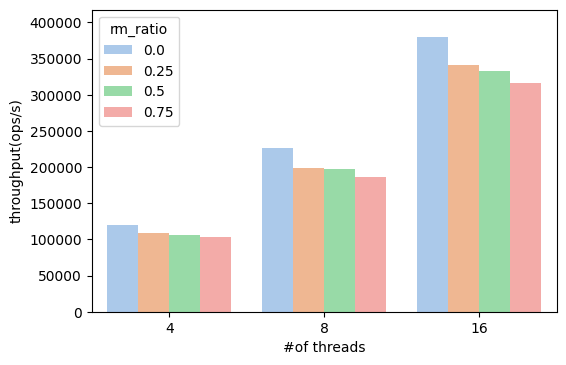

,conf_id,workload,cache_size,rm_ratio,threads,version,runtime,latency,latency(%),throughput,throughput(%)
0,1567,b,34359738368,0.00,4,debug-v0,332.297,32.02,85.821496,120374.0,100.000000
1,1569,b,34359738368,0.25,4,debug-v0,369.655,35.79,95.926025,108209.0,89.893997
2,1570,b,34359738368,0.50,4,debug-v0,377.206,36.16,96.917716,106043.0,88.094605
3,1571,b,34359738368,0.75,4,debug-v0,387.063,37.31,100.000000,103342.0,85.850765
4,1572,b,34359738368,0.00,8,debug-v0,176.996,33.86,83.978175,225994.0,100.000000
5,1574,b,34359738368,0.25,8,debug-v0,201.816,37.94,94.097222,198200.0,87.701443
6,1575,b,34359738368,0.50,8,debug-v0,202.613,38.58,95.684524,197421.0,87.356744
7,1576,b,34359738368,0.75,8,debug-v0,214.549,40.32,100.000000,186438.0,82.496880
8,1577,b,34359738368,0.00,16,debug-v0,105.369,39.56,82.865522,379619.0,100.000000
9,1579,b,34359738368,0.25,16,debug-v0,117.295,44.31,92.815249,341022.0,89.832701


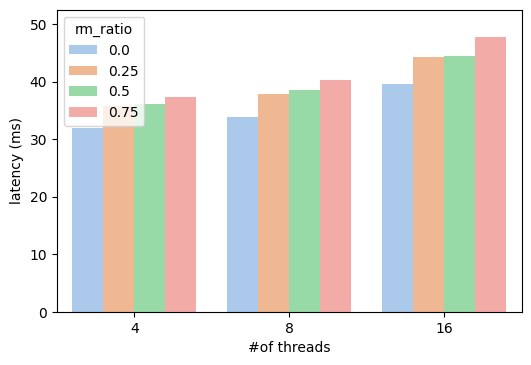

operationcount=40000000, cache_size=68719476736, threads=4
skip(1582) skip(1584) skip(1585) skip(1586) 
operationcount=40000000, cache_size=68719476736, threads=8
skip(1587) skip(1589) skip(1590) skip(1591) 
operationcount=40000000, cache_size=68719476736, threads=16
skip(1592) skip(1594) skip(1595) skip(1596) 


<Figure size 432x288 with 0 Axes>

In [14]:
import yaml
from exprmngr import ExprMngr
from ycsb_exprmngr import DB_PATH, parse_log
import seaborn as sns
import pandas as pd
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np

table_def = yaml.load(open('etc/table_def.yaml').read(), Loader=yaml.SafeLoader)
config = yaml.load(open('etc/config.yaml').read(), Loader=yaml.SafeLoader)
mngr = ExprMngr(table_def, DB_PATH, config)

workload = 'b'
zipfian_alpha = 0.99
requestdistribution = 'zipfian'
max_write_buffer_number = 4
min_write_buffer_number_to_merge = max_write_buffer_number - 2
max_background_jobs = 8
table_cache_numshardbits = 6
write_buffer_size = 256*1024**2
recordcount = 134217728
operationcount = 40000000
version = 'debug-v0'
# version = 'p5800'

ax_id = 0
data_df = None
for cache_size in [32*1024**3,64*1024**3]:
    for threads in [4,8,16]:
        print(f'{operationcount=}, {cache_size=}, {threads=}')
        inner_data_df = None
        for rm_ratio in [0.0,0.25,0.5,0.75]:
            conf_id = mngr.get_id(workload=workload, recordcount=recordcount, operationcount=operationcount, threads=threads, write_buffer_size=write_buffer_size, cache_size=cache_size, version=version, zipfian_alpha=zipfian_alpha, requestdistribution=requestdistribution,max_write_buffer_number=max_write_buffer_number,max_background_jobs=max_background_jobs, table_cache_numshardbits=table_cache_numshardbits,min_write_buffer_number_to_merge=min_write_buffer_number_to_merge, rm_ratio=rm_ratio)
            if not osp.exists(mngr.get_local_log_path(conf_id)):
                print(f'skip({conf_id})', end=' ')
                continue
            try:
                single_dict = parse_log(mngr.get_local_log_path(conf_id))
            except:
                print(f'skip({conf_id}({workload}))', end=' ')
                continue
            print(f'{conf_id}({workload})', end=' ')
            single_dict['workload'] = workload
            single_dict['cache_size'] = cache_size
            single_dict['rm_ratio'] = rm_ratio
            single_dict['threads'] = threads
            single_dict['version'] = version
            single_dict['conf_id'] = conf_id
            single_df = pd.DataFrame([single_dict])
            inner_data_df = single_df if inner_data_df is None else pd.concat([inner_data_df, single_df], ignore_index=True)
        if inner_data_df is not None and 'throughput' in inner_data_df.columns:
            inner_data_df['throughput(%)'] = inner_data_df['throughput'] / inner_data_df['throughput'].max() * 100
        if inner_data_df is not None and 'throughput' in inner_data_df.columns:
            inner_data_df['latency(%)'] = inner_data_df['latency'] / inner_data_df['latency'].max() * 100
        if inner_data_df is not None:
            data_df = inner_data_df if data_df is None else pd.concat([data_df, inner_data_df], ignore_index=True)
        print()
    if data_df is None:
        continue
    mngr.conn.commit()
    data_df = data_df[['conf_id', 'workload', 'cache_size', 'rm_ratio', 'threads', 'version', 'runtime', 'latency', 'latency(%)', 'throughput', 'throughput(%)']]
    fig = plt.figure(dpi=100)
    display(data_df)
    ax = plt.gca()
    y_label = 'throughput'
    # y_label = 'throughput(%)'
    sns.barplot(x='threads', y=y_label, hue='rm_ratio', data=data_df, ax=ax, palette=sns.color_palette("pastel"))
    ax.set_ylim(0, data_df[y_label].max() * 1.1)
    ax.set_xlabel('#of threads')
    ax.set_ylabel(y_label if y_label.endswith('(%)') else 'throughput(ops/s)')
    plt.show()
    # latency
    fig = plt.figure(dpi=100)
    ax = plt.gca()
    y_label = 'latency'
    # y_label = 'latency(%)'
    sns.barplot(x='threads', y=y_label, hue='rm_ratio', data=data_df, ax=ax, palette=sns.color_palette("pastel"))
    ax.set_ylim(0, data_df[y_label].max() * 1.1)
    ax.set_xlabel('#of threads')
    ax.set_ylabel(y_label if y_label.endswith('(%)') else 'latency (ms)')
    plt.show()
    data_df = None
plt.tight_layout()

## YCSB-C

operationcount=40000000, cache_size=34359738368, threads=4
1423(c) 1425(c) 1426(c) 1427(c) 
operationcount=40000000, cache_size=34359738368, threads=8
1428(c) 1430(c) 1431(c) 1432(c) 
operationcount=40000000, cache_size=34359738368, threads=16
1433(c) 1435(c) 1436(c) 1437(c) 


,conf_id,mtime,workload,cache_size,rm_ratio,threads,version,runtime,latency,latency(%),throughput,throughput(%)
0,1423,2022-05-14 23:00,c,34359738368,0.00,4,debug-v0,190.7090,17.56,78.079146,209744.0,100.000000
1,1425,2022-05-15 01:44,c,34359738368,0.25,4,debug-v0,224.2380,20.44,90.884838,178382.0,85.047486
2,1426,2022-05-15 02:26,c,34359738368,0.50,4,debug-v0,227.0350,20.98,93.285905,176185.0,84.000019
3,1427,2022-05-14 22:47,c,34359738368,0.75,4,debug-v0,241.8920,22.49,100.000000,165363.0,78.840396
4,1428,2022-05-14 20:28,c,34359738368,0.00,8,debug-v0,95.4802,17.18,74.695652,418935.0,100.000000
5,1430,2022-05-15 00:16,c,34359738368,0.25,8,debug-v0,113.3950,20.32,88.347826,352750.0,84.201606
6,1431,2022-05-14 23:08,c,34359738368,0.50,8,debug-v0,114.1940,20.44,88.869565,350280.0,83.612016
7,1432,2022-05-14 21:02,c,34359738368,0.75,8,debug-v0,127.5620,23.00,100.000000,313572.0,74.849798
8,1433,2022-05-15 23:26,c,34359738368,0.00,16,debug-v0,52.2357,18.94,75.158730,765760.0,100.000000
9,1435,2022-05-14 20:07,c,34359738368,0.25,16,debug-v0,61.0056,21.87,86.785714,655677.0,85.624347


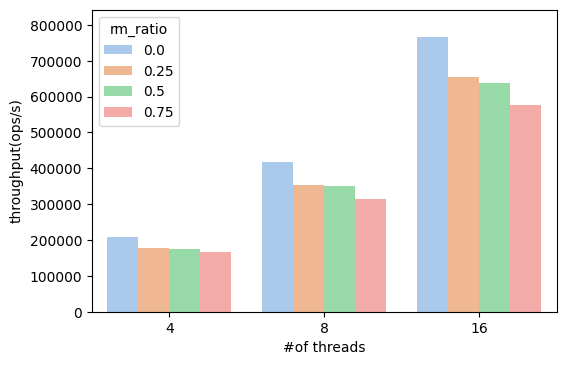

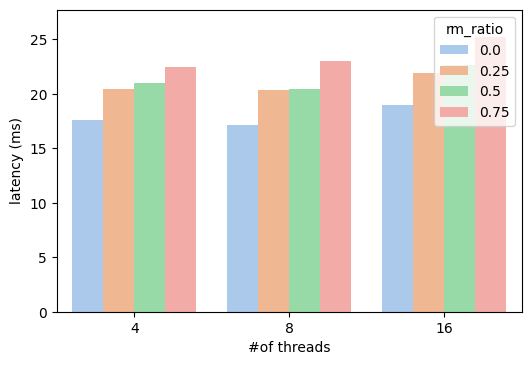

<Figure size 432x288 with 0 Axes>

In [17]:
import yaml
from exprmngr import ExprMngr
from ycsb_exprmngr import DB_PATH, parse_log
import seaborn as sns
import pandas as pd
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np

table_def = yaml.load(open('etc/table_def.yaml').read(), Loader=yaml.SafeLoader)
config = yaml.load(open('etc/config.yaml').read(), Loader=yaml.SafeLoader)
mngr = ExprMngr(table_def, DB_PATH, config)

zipfian_alpha = 0.99
requestdistribution = 'zipfian'
max_write_buffer_number = 4
max_background_jobs = 8
workload = 'c'
min_write_buffer_number_to_merge = max_write_buffer_number - 2
write_buffer_size = 256*1024**2
recordcount = 134217728
operationcount = 40000000
table_cache_numshardbits = 6
version = 'debug-v0'
# version = 'p5800'

data_df = None
for cache_size in [32*1024**3]:
    for threads in [4,8,16]:
        print(f'{operationcount=}, {cache_size=}, {threads=}')
        inner_data_df = None
        for rm_ratio in [0.0,0.25,0.5,0.75]:
            conf_id = mngr.get_id(workload=workload, recordcount=recordcount, operationcount=operationcount, threads=threads, write_buffer_size=write_buffer_size, cache_size=cache_size, version=version, zipfian_alpha=zipfian_alpha, requestdistribution=requestdistribution,max_write_buffer_number=max_write_buffer_number,max_background_jobs=max_background_jobs, table_cache_numshardbits=table_cache_numshardbits,min_write_buffer_number_to_merge=min_write_buffer_number_to_merge, rm_ratio=rm_ratio)
            if not osp.exists(mngr.get_local_log_path(conf_id)):
                print(f'skip({conf_id})', end=' ')
                continue
            try:
                single_dict = parse_log(mngr.get_local_log_path(conf_id))
            except:
                print(f'skip({conf_id}({workload}))', end=' ')
                continue
            print(f'{conf_id}({workload})', end=' ')
            single_dict['workload'] = workload
            single_dict['cache_size'] = cache_size
            single_dict['rm_ratio'] = rm_ratio
            single_dict['threads'] = threads
            single_dict['version'] = version
            single_dict['conf_id'] = conf_id
            single_df = pd.DataFrame([single_dict])
            inner_data_df = single_df if inner_data_df is None else pd.concat([inner_data_df, single_df], ignore_index=True)
        if inner_data_df is not None and 'throughput' in inner_data_df.columns:
            inner_data_df['throughput(%)'] = inner_data_df['throughput'] / inner_data_df['throughput'].max() * 100
        if inner_data_df is not None and 'throughput' in inner_data_df.columns:
            inner_data_df['latency(%)'] = inner_data_df['latency'] / inner_data_df['latency'].max() * 100
        if inner_data_df is not None:
            data_df = inner_data_df if data_df is None else pd.concat([data_df, inner_data_df], ignore_index=True)
        print()
    if data_df is None:
        continue
    mngr.conn.commit()
    data_df = data_df[['conf_id', 'mtime', 'workload', 'cache_size', 'rm_ratio', 'threads', 'version', 'runtime', 'latency', 'latency(%)', 'throughput', 'throughput(%)']]
    # throughput
    fig = plt.figure(dpi=100)
    display(data_df)
    ax = plt.gca()
    y_label = 'throughput'
    # y_label = 'throughput(%)'
    sns.barplot(x='threads', y=y_label, hue='rm_ratio', data=data_df, ax=ax, palette=sns.color_palette("pastel"))
    ax.set_ylim(0, data_df[y_label].max() * 1.1)
    ax.set_xlabel('#of threads')
    ax.set_ylabel(y_label if y_label.endswith('(%)') else 'throughput(ops/s)')
    plt.show()
    # latency
    fig = plt.figure(dpi=100)
    ax = plt.gca()
    y_label = 'latency'
    # y_label = 'latency(%)'
    sns.barplot(x='threads', y=y_label, hue='rm_ratio', data=data_df, ax=ax, palette=sns.color_palette("pastel"))
    ax.set_ylim(0, data_df[y_label].max() * 1.1)
    ax.set_xlabel('#of threads')
    ax.set_ylabel(y_label if y_label.endswith('(%)') else 'latency (ms)')
    plt.show()
    data_df = None
plt.tight_layout()

## RM v.s. SSD

operationcount=40000000, cache_size=34359738368, threads=16
1435(c) 1730(c) 1436(c) 1731(c) 1437(c) 1413(c) 


,conf_id,mtime,workload,local_cache_size,local_cache_size(GB),cache_size,rm_ratio,threads,version,runtime,latency,throughput
0,1435,2022-05-15 23:36,c,25769803776,32,34359738368,0.25,16,debug-v0,61.0056,21.87,655677.0
1,1730,2022-05-16 00:12,c,25769803776,32,34359738368,0.00,16,debug-v0,51.7985,18.43,772222.0
2,1436,2022-05-15 23:36,c,17179869184,32,34359738368,0.50,16,debug-v0,62.6686,22.63,638278.0
3,1731,2022-05-16 00:16,c,17179869184,32,34359738368,0.00,16,debug-v0,52.1767,18.55,766626.0
4,1437,2022-05-15 23:36,c,8589934592,32,34359738368,0.75,16,debug-v0,69.4570,25.20,575896.0
5,1413,2022-05-16 00:19,c,8589934592,32,34359738368,0.00,16,debug-v0,53.6598,19.03,745437.0


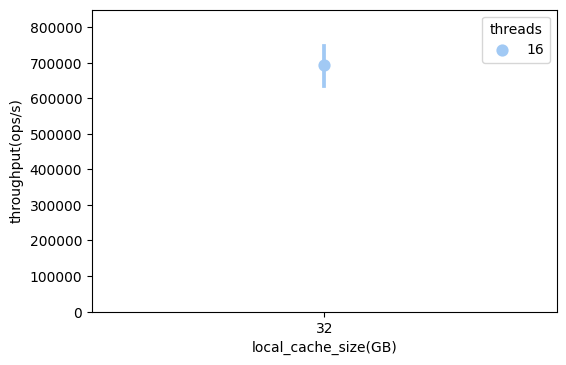

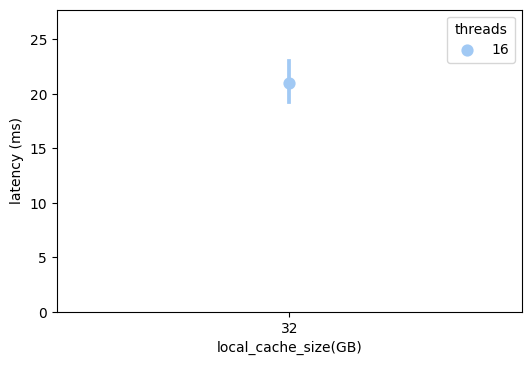

<Figure size 432x288 with 0 Axes>

In [37]:
import yaml
from exprmngr import ExprMngr
from ycsb_exprmngr import DB_PATH, parse_log
import seaborn as sns
import pandas as pd
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np

table_def = yaml.load(open('etc/table_def.yaml').read(), Loader=yaml.SafeLoader)
config = yaml.load(open('etc/config.yaml').read(), Loader=yaml.SafeLoader)
mngr = ExprMngr(table_def, DB_PATH, config)

zipfian_alpha = 0.99
requestdistribution = 'zipfian'
max_write_buffer_number = 4
max_background_jobs = 8
workload = 'c'
min_write_buffer_number_to_merge = max_write_buffer_number - 2
write_buffer_size = 256*1024**2
recordcount = 134217728
operationcount = 40000000
table_cache_numshardbits = 6
version = 'debug-v0'
# version = 'p5800'

cache_size = 32*1024**3

data_df = None
for threads in [16]:
    print(f'{operationcount=}, {cache_size=}, {threads=}')
    inner_data_df = None
    for rm_ratio in [0.25,0.5,0.75]:
        local_cache_size = int(cache_size * (1-rm_ratio))
        conf_id = mngr.get_id(workload=workload, recordcount=recordcount, operationcount=operationcount, threads=threads, write_buffer_size=write_buffer_size, cache_size=cache_size, version=version, zipfian_alpha=zipfian_alpha, requestdistribution=requestdistribution,max_write_buffer_number=max_write_buffer_number,max_background_jobs=max_background_jobs, table_cache_numshardbits=table_cache_numshardbits,min_write_buffer_number_to_merge=min_write_buffer_number_to_merge, rm_ratio=rm_ratio)
        if not osp.exists(mngr.get_local_log_path(conf_id)):
            print(f'skip({conf_id})', end=' ')
            continue
        try:
            single_dict = parse_log(mngr.get_local_log_path(conf_id))
        except:
            print(f'skip({conf_id}({workload}))', end=' ')
            continue
        print(f'{conf_id}({workload})', end=' ')
        single_dict['workload'] = workload
        single_dict['cache_size'] = cache_size
        single_dict['local_cache_size'] = local_cache_size
        single_dict['rm_ratio'] = rm_ratio
        single_dict['threads'] = threads
        single_dict['version'] = version
        single_dict['conf_id'] = conf_id
        single_df = pd.DataFrame([single_dict])
        inner_data_df = single_df if inner_data_df is None else pd.concat([inner_data_df, single_df], ignore_index=True)

        # SSD
        rm_ratio = 0.0
        conf_id = mngr.get_id(workload=workload, recordcount=recordcount, operationcount=operationcount, threads=threads, write_buffer_size=write_buffer_size, cache_size=local_cache_size, version=version, zipfian_alpha=zipfian_alpha, requestdistribution=requestdistribution,max_write_buffer_number=max_write_buffer_number,max_background_jobs=max_background_jobs, table_cache_numshardbits=table_cache_numshardbits,min_write_buffer_number_to_merge=min_write_buffer_number_to_merge, rm_ratio=rm_ratio)
        if not osp.exists(mngr.get_local_log_path(conf_id)):
            print(f'skip({conf_id})', end=' ')
            continue
        try:
            single_dict = parse_log(mngr.get_local_log_path(conf_id))
        except:
            print(f'skip({conf_id}({workload}))', end=' ')
            continue
        print(f'{conf_id}({workload})', end=' ')
        single_dict['workload'] = workload
        single_dict['cache_size'] = cache_size
        single_dict['local_cache_size'] = local_cache_size
        single_dict['rm_ratio'] = rm_ratio
        single_dict['threads'] = threads
        single_dict['version'] = version
        single_dict['conf_id'] = conf_id
        single_df = pd.DataFrame([single_dict])
        inner_data_df = single_df if inner_data_df is None else pd.concat([inner_data_df, single_df], ignore_index=True)
    if inner_data_df is not None:
        data_df = inner_data_df if data_df is None else pd.concat([data_df, inner_data_df], ignore_index=True)
    print()
mngr.conn.commit()
data_df['local_cache_size(GB)'] = data_df['cache_size'] // 1024**3
data_df = data_df[['conf_id', 'mtime', 'workload', 'local_cache_size', 'local_cache_size(GB)', 'cache_size', 'rm_ratio', 'threads', 'version', 'runtime', 'latency', 'throughput']]
# throughput
fig = plt.figure(dpi=100)
display(data_df)
ax = plt.gca()
y_label = 'throughput'
# y_label = 'throughput(%)'
sns.pointplot(x='local_cache_size(GB)', y=y_label, hue='threads', data=data_df, ax=ax, palette=sns.color_palette("pastel"))
ax.set_ylim(0, data_df[y_label].max() * 1.1)
ax.set_xlabel('local_cache_size(GB)')
ax.set_ylabel(y_label if y_label.endswith('(%)') else 'throughput(ops/s)')
plt.show()
# latency
fig = plt.figure(dpi=100)
ax = plt.gca()
y_label = 'latency'
# y_label = 'latency(%)'
sns.pointplot(x='local_cache_size(GB)', y=y_label, hue='threads', data=data_df, ax=ax, palette=sns.color_palette("pastel"))
ax.set_ylim(0, data_df[y_label].max() * 1.1)
ax.set_xlabel('local_cache_size(GB)')
ax.set_ylabel(y_label if y_label.endswith('(%)') else 'latency (ms)')
plt.show()
data_df = None
plt.tight_layout()